
# 项目：调查TMDb电影数据集

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

>这是对TMDb电影数据集进行分析的一份报告。报告包含数据整理，数据分析，结论几个部分。报告根据数据集，主要对‘什么类型的电影最受大家欢迎’，‘电影的收入和什么有关’两个问题进行了研究分析。

导入数据包和加载数据

In [1]:
# 导入语句。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
df = pd.read_csv('tmdb-movies.csv')


<a id='wrangling'></a>
## 数据整理

### 常规属性

In [2]:
# 打印几行熟悉数据
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
#随机查看数据
df.sample(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3805,60170,tt1651062,0.208023,0,0,Christopher and His Kind,Matt Smith|Toby Jones|Imogen Poots|Lindsay Dun...,http://www.bbc.co.uk/programmes/b00ztfl9,Geoffrey Sax,NaN,...,In 1931 budding author Christopher Isherwood g...,90,Drama|Romance,Mammoth Screen,3/19/11,15,6.7,2011,0.000000e+00,0.000000e+00
180,256962,tt1810683,0.829111,20000000,6420319,Little Boy,Jakob Salvati|Emily Watson|Cary-Hiroyuki Tagaw...,http://www.littleboymovie.com/,Alejandro Monteverde,Believe the impossible.,...,An eight-year-old boy is willing to do whateve...,106,Comedy|Drama|War,Metanoia Films,4/23/15,113,7.1,2015,1.839999e+07,5.906691e+06
8609,19002,tt0116033,0.301638,0,0,Darkman III: Die Darkman Die,Jeff Fahey|Arnold Vosloo|Darlanne Fluegel|Roxa...,NaN,Bradford May,One fights for justice. The other for power. O...,...,"Darkman, needing money to continue his experim...",87,Action|Thriller|Science Fiction,Renaissance Pictures,8/20/96,16,3.4,1996,0.000000e+00,0.000000e+00


In [4]:
#数据集描述
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
#数据集大小
df.shape

(10866, 21)

In [6]:
#查看数据集的类型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
#查看object的数据类型
print(type(df['imdb_id'][0]))
print(type(df['original_title'][0]))
print(type(df['cast'][0]))
print(type(df['homepage'][0]))
print(type(df['director'][0]))
print(type(df['tagline'][0]))
print(type(df['keywords'][0]))
print(type(df['overview'][0]))
print(type(df['genres'][0]))
print(type(df['production_companies'][0]))
print(type(df['release_date'][0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [8]:
#查看冗余的数据数
df.duplicated().sum()

1

数据冗余数1

In [9]:
#缺失的数据数
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

缺失数据的列为imdb_id，cast，homepage，director，tagline，keywords，overview，genres，production_companies列，分别缺失10，76，7930，4，2824，1493，4，23，1030组数据

### 数据清理
对数据整理中的数据冗余和数据缺失进行处理

In [10]:
#复制数据防止出错
df1 = df.copy()

In [11]:
#删掉冗余数据
df1.drop_duplicates(inplace = True)
#将发布时间的数据类型改为datatime
df1['release_date'] = pd.to_datetime(df['release_date'])
#用0填充缺失的数据
df1.fillna(0,inplace=True)
df1.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [12]:
#查看数据是否填满空集
df1.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [13]:
#查看是否删除冗余
df1.duplicated().sum()

0

<a id='eda'></a>
## 探索性数据分析

### 研究问题 1:什么类型的电影最受欢迎？

In [14]:
#查看genres的数据分类
df1['genres'].value_counts()

Drama                                             712
Comedy                                            712
Documentary                                       312
Drama|Romance                                     289
Comedy|Drama                                      280
Comedy|Romance                                    268
Horror|Thriller                                   259
Horror                                            253
Comedy|Drama|Romance                              222
Drama|Thriller                                    138
Comedy|Family                                     102
Action|Thriller                                   101
Thriller                                           93
Drama|Comedy                                       92
Animation|Family                                   90
Crime|Drama|Thriller                               81
Crime|Drama                                        74
Comedy|Horror                                      72
Drama|Comedy|Romance        

genres的数据分类太多，需要将其汇总为Action，Comedy等几个大类

In [15]:
#修改genres的数据类型为字符
df1.genres = df1.genres.astype(str)

In [16]:
#将电影大类赋值给genres
genres_set = set()

for x in df1['genres']:
    genres_set.update(x.split('|')) 

genres_set

{'0',
 'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [17]:
#修改genres列使其横向显示
for genres in genres_set:
    df1[genres] = df1['genres'].str.contains(genres).apply(lambda x:1 if x else 0)
df1.head(2)    

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,Science Fiction,TV Movie,Fantasy,Western,Animation,Family,Horror,War,Foreign,Music
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,1,0,0,0,0,0,0,0,0,0
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,1,0,0,0,0,0,0,0,0,0


In [18]:
genres_list=pd.DataFrame(columns = genres_set)

In [19]:
#创建函数提前不同列和电影类型的函数
def relationship_genres (x,y):
    genres_list=pd.DataFrame(columns = genres_set)
    if y == 'sum':
        for genres in genres_set:
            genres_list[genres]=df1.groupby(genres)[x].sum()
    elif y == 'mean': 
        for genres in genres_set:
            genres_list[genres]=df1.groupby(genres)[x].mean()     
    a=[]
    for genres in genres_set:
        a.append(genres_list[genres][1])
    return genres_list,a

In [20]:
#创建一个电影类型和电影评分的表
genres_list,a=relationship_genres('vote_average','mean')

In [21]:
#提取电影类型
b=genres_list.columns

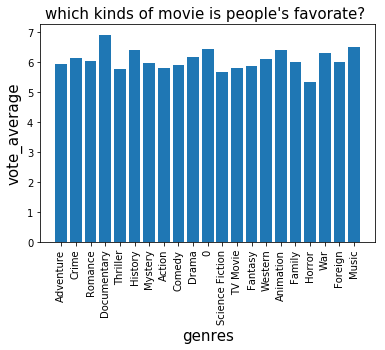

In [22]:
#绘制评分和电影类型的直方图
#由于电影类型太多先用数字代替
plt.bar(b,a)
plt.title("which kinds of movie is people's favorate? ", fontsize = 15)
plt.ylabel('vote_average', fontsize =15) 
plt.xlabel('genres', fontsize =15)  
plt.xticks(rotation=90)
plt.show()

In [150]:
#创建一个电影类型和电影评分次数的表
genres_list,a=relationship_genres('vote_count','sum')

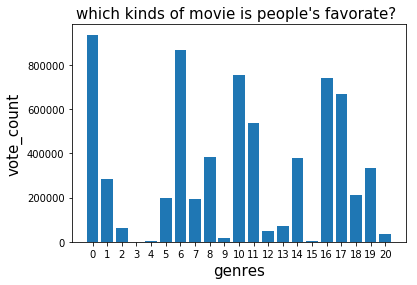

In [151]:
#绘制评分和电影类型的直方图
#由于电影类型太多先用数字代替
plt.figure(figsiz=(10,5))
plt.bar(b,a)
plt.title("which kinds of movie is people's favorate? ", fontsize = 15)
plt.ylabel('vote_count', fontsize =15) 
plt.xlabel('genres', fontsize =15)  
plt.xticks(rotation=90))
plt.show()

In [152]:
b

Index(['Action', 'Romance', 'History', '0', 'TV Movie', 'Horror', 'Drama',
       'Mystery', 'Fantasy', 'Documentary', 'Adventure', 'Science Fiction',
       'Music', 'War', 'Crime', 'Foreign', 'Thriller', 'Comedy', 'Animation',
       'Family', 'Western'],
      dtype='object')

#### 小结
从上面的两张图表我们可以得出记录片评分最高，评分次数最多的为动作片。综合两张表动作片的评分次数和评分综合最高。因此，推断动作片是最受欢迎的电影

### 研究问题 2：票房收入和什么有关？
本问题研究了电影类型，电影发行年份以及电影投入和电影票房收入的关系。

### 电影收入和电影类型的关系

In [23]:
#生成电影收入和电影类型的表
revenue_list,a=relationship_genres('revenue','mean')
revenue_list

,Adventure,Crime,Romance,Documentary,Thriller,History,Mystery,Action,Comedy,Drama,...,Science Fiction,TV Movie,Fantasy,Western,Animation,Family,Horror,War,Foreign,Music
Adventure,,,,,,,,,,,,,,,,,,,,,
0,2.834718e+07,3.946505e+07,4.060030e+07,4.172623e+07,3.913228e+07,4.007476e+07,3.979542e+07,3.055967e+07,4.106083e+07,4.808742e+07,...,3.596061e+07,4.044468e+07,3.462619e+07,4.000050e+07,3.739084e+07,3.566058e+07,4.390770e+07,3.962868e+07,4.050139e+07,4.026604e+07
1,1.131379e+08,4.236866e+07,3.569197e+07,2.041107e+06,4.172842e+07,3.201179e+07,4.021757e+07,7.279473e+07,3.752624e+07,2.923226e+07,...,7.014056e+07,2.514970e+05,9.631366e+07,2.856871e+07,7.525606e+07,7.243318e+07,1.682281e+07,4.760518e+07,1.520460e+06,2.857177e+07


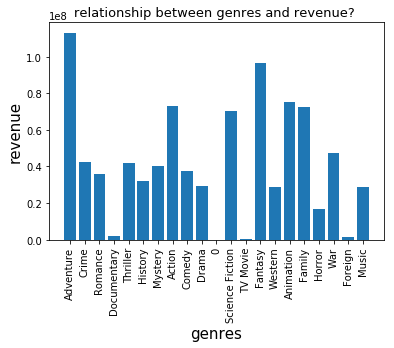

In [25]:
#绘制电影收入和电影类型的直方图
plt.bar(b,a)
plt.title("relationship between genres and revenue? ", fontsize = 13)
plt.ylabel('revenue', fontsize =15) 
plt.xlabel('genres', fontsize =15)  
plt.xticks(rotation=90)
plt.show()

#### 小结
从图中可以看出电影类在一定程度上决定了电影的收入,类型为电视电影、记录片、外语片的电影收入很低（其中3类型为缺失不予判断），收入最高的电影是冒险类型的片子。

### 电影收入和电影发行年份的关系

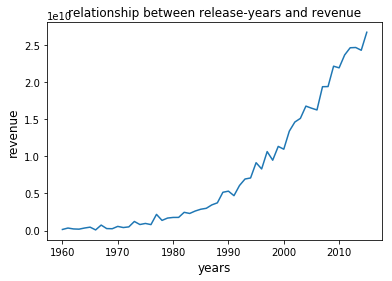

In [26]:
nums = df1.groupby('release_year')['revenue'].sum()
year = df1['release_year']

nums.plot(x = year, y =nums)

plt.title('relationship between release-years and revenue', fontsize = 12)
plt.ylabel('revenue', fontsize =12) 
plt.xlabel('years', fontsize =12)  
plt.xticks(range(1960, 2018, 10))
plt.show()

#### 小结
从表中看出电影收入随发行年份的增加儿增加，这很经济增长的趋势相同，反映出电影收入随经济增长而增长。

### 电影收入和电影投入的关系

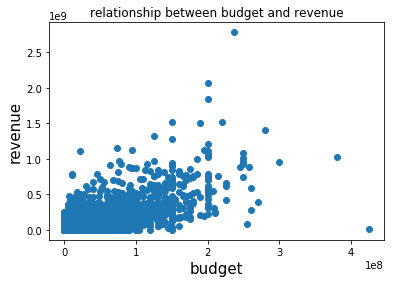

In [37]:
nums = df1['revenue']
budget = df1['budget']

plt.scatter(budget, nums)

plt.title('relationship between budget and revenue', fontsize = 12)
plt.ylabel('revenue', fontsize =15) 
plt.xlabel('budget', fontsize =15)  
plt.show()

#### 小结
从图中看出电影的收入的高低和电影投入有一定关系。当投资大于2千万时电影高收入的概率更大。说明适当的投入可以提高电影收入。

<a id='conclusions'></a>
## 结论

这次报告可以得出最受欢迎的电影类型为动作片；电影的类型会一定程度上决定电影收入，冒险片是收入最高的电影类型；电影的收入随发行年份增加而增加，这可能是受经济发展的影响，经济越好，电影收入越高；电影的投入也影响着电影的收入，电影投入在2千万左右电影高收入概率更大。
### 不足之处
1.确定最受欢迎电影类型时没有定量的权衡电影评分和点评次数，只通过观察图表就得出了结论。
2.没有深入研究发行年份和电影收入的关系。
3.没有定量分析电影收入和电影投入的关系。